# Intro

Este notebook contiene un ejemplo básico del uso de <code> mesa </code> para el modelado basado en agentes. Este ejemplo es desarrollado en el [turorial] (https://mesa.readthedocs.io/en/master/tutorials/intro_tutorial.html#tutorial-description) básico en la página oficial de la documentacon de <code> mesa </code>.

La base de este ejemplo, es un modelo básico de agentes intercambiando dinero como un enfoque básico al modelado de la distribución del ingreso ([Dragulescu 2002](http://arxiv.org/abs/cond-mat/0211175)). Las reglas básicas del modelo son las siguentes:

   * N agentes
   * Todos los agentes empeiazan con una unidad de dinero
   * En cada paso (temporal), un agente da esa unidad de dinero (si lo tiene) a otro agente
   

Para iniciar con un modelo en mesa se crean dos clases basadas en las clases de mesa: Agent y Model


In [3]:
from mesa import Agent, Model

class MoneyAgent(Agent):
    """An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N):
        self.num_agents = N
        # Create agents
        #self.list_of_agents=[] #yo puse esta lista para añadir los agentes creados por el modelo
                            #pero debe haber un atributo en la parent class M que los guarde?
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            #self.list_of_agents.append(a)

In [4]:
basico=MoneyModel(9)
#basico.list_of_agents[8].wealth
dir(basico)
basico.step() #no hay nada definido en el parent ni en el child classes

Añadiendo las funciones de pasos y <code> scheduler </code>

In [5]:
from mesa import Agent, Model
from mesa.time import RandomActivation

class MoneyAgent(Agent):
    """An agent with fixed initial wealth.""" #Atributos iniciales del agente
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1
        
    def step(self): #Acción que realiza el agente cuando es 'activado'
        print(f'Hola, soy el {self.unique_id}-ésimo agente')
        self.wealth +=1 #aumenta su riqueza en una unidad
        print(f'Mi nueva riqueza es {self.wealth}') #imprime su nueva riqueza
        

class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N): #atributos del modelo
        self.num_agents = N
        self.schedule = RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
            
    def step(self):
        '''Avanza el modelo un paso'''
        self.schedule.step()

In [6]:
modelo_1=MoneyModel(10)

In [7]:
type(modelo_1.schedule.agents) #esta es la lista de los agentes creados al crear el modelo 

list

In [8]:
modelo_1.step()

Hola, soy el 8-ésimo agente
Mi nueva riqueza es 2
Hola, soy el 0-ésimo agente
Mi nueva riqueza es 2
Hola, soy el 9-ésimo agente
Mi nueva riqueza es 2
Hola, soy el 5-ésimo agente
Mi nueva riqueza es 2
Hola, soy el 4-ésimo agente
Mi nueva riqueza es 2
Hola, soy el 6-ésimo agente
Mi nueva riqueza es 2
Hola, soy el 2-ésimo agente
Mi nueva riqueza es 2
Hola, soy el 3-ésimo agente
Mi nueva riqueza es 2
Hola, soy el 7-ésimo agente
Mi nueva riqueza es 2
Hola, soy el 1-ésimo agente
Mi nueva riqueza es 2


Ahora se modifica el paso del agente para que le de su riqueza a un agente de manera random con las paqueterías random que incluye mesa

In [91]:
from mesa import Agent, Model
from mesa.time import RandomActivation
import random as rm

class MoneyAgent(Agent):
    """An agent with fixed initial wealth.""" #Atributos iniciales del agente
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1
        
    def step(self):
        if self.wealth == 0:
            #print(f'El {self.unique_id}-ésimo agente no tiene riqueza')
            return
        other_agent=rm.choice(self.model.schedule.agents) #using  simple random choice from python
        #other_agent = self.random.choice(self.model.schedule.agents) #metodos para seleccion 
                                                                  #aleatoria de mesa
                    #lo que esta en el ultimo parentesis es la lista de agentes que se creo para 
                    # en scheduler
        other_agent.wealth += 1
        self.wealth -= 1
        #print(f'soy el agente {self.unique_id} y tengoo {self.wealth} riqueza')
    
        
class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N): #atributos del modelo
        self.num_agents = N
        self.schedule = RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
            
    def step(self):
        '''Avanza el modelo un paso'''
        self.schedule.step()

In [92]:
model = MoneyModel(100)
for i in range(10):
    model.step()
    #print('End of step')
for item in model.schedule.agents: #esto imprime la riqueza de los agentes pero no estan en 
                                    #orden porque es la lista del random scheduler
    #print(f'La riqueza del {item.unique_id} agente es {item.wealth}') #al parecer la lista si 
    pass                                                    #es ordenada


**Obteniendo datos del modelo**

"Next, we need to get some data out of the model. Specifically, we want to see the distribution of the agent’s wealth. We can get the wealth values with list comprehension, and then use matplotlib (or another graphics library) to visualize the data in a histogram."

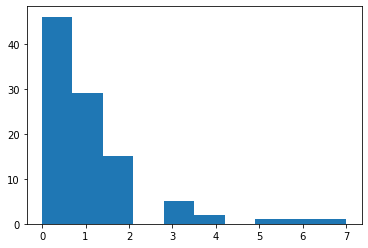

In [93]:
# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt

# For jupyter notebook add the following line:
%matplotlib inline

agent_wealth = [a.wealth for a in model.schedule.agents] #list comprehension :)
plt.hist(agent_wealth)
#For a script add the following line
plt.show()

"To get a better idea of how a model behaves, we can create multiple model runs and see the distribution that emerges from all of them. We can do this with a nested for loop:"

In [97]:
all_wealth = []
#This runs the model 100 times, each model executing 10 steps.
for j in range(100):
    # Run the model
    model = MoneyModel(100)
    for i in range(10):
        model.step()

    # Store the results
    for agent in model.schedule.agents:
        all_wealth.append(agent.wealth)

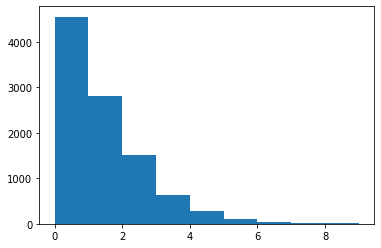

In [98]:
plt.hist(all_wealth, bins=range(max(all_wealth)+1))
plt.show()

This runs 100 instantiations of the model, and runs each for 10 steps. (Notice that we set the histogram bins to be integers, since agents can only have whole numbers of wealth). This distribution looks a lot smoother. By running the model 100 times, we smooth out some of the ‘noise’ of randomness, and get to the model’s overall expected behavior.

This outcome might be surprising. Despite the fact that all agents, on average, give and receive one unit of money every step, the model converges to a state where most agents have a small amount of money and a small number have a lot of money.

# Referencias 
[Dragulescu2002] Drăgulescu, Adrian A., and Victor M. Yakovenko. “Statistical Mechanics of Money, Income, and Wealth: A Short Survey.” arXiv Preprint Cond-mat/0211175, 2002.
[link](http://arxiv.org/abs/cond-mat/0211175)

[Tutorial](https://mesa.readthedocs.io/en/master/tutorials/intro_tutorial.html#tutorial-description) in mesa.readthedocs.io 